In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [2]:
target.head()

0        donated
1        donated
2        donated
3        donated
4    not donated
Name: Class, dtype: object

In [3]:
target.index

RangeIndex(start=0, stop=748, step=1)

In [4]:
target.describe

<bound method NDFrame.describe of 0          donated
1          donated
2          donated
3          donated
4      not donated
          ...     
743    not donated
744    not donated
745    not donated
746    not donated
747    not donated
Name: Class, Length: 748, dtype: object>

In [5]:
target.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0          donated
1          donated
2          donated
3          donated
4      not donated
          ...     
743    not donated
744    not donated
745    not donated
746    not donated
747    not donated
Name: Class, Length: 748, dtype: object>

In [6]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

In [7]:
target.unique()

array(['donated', 'not donated'], dtype=object)

In [8]:
target.value_counts(normalize=True)

not donated    0.762032
donated        0.237968
Name: Class, dtype: float64

In [9]:
target = target.replace("not donated", 0)


In [10]:
target = target.replace("donated", 1)

In [11]:
target.value_counts(normalize=True)

0    0.762032
1    0.237968
Name: Class, dtype: float64

In [12]:
data.shape

(748, 4)

In [13]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(data, target)

dummy_clf.predict(data)

dummy_clf.score(data, target)

0.7620320855614974

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

model = make_pipeline( DummyClassifier(strategy="most_frequent"))
cv_result = cross_validate(model, data, target, cv=10)
cv_result

scores = cv_result["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.762 +/- 0.004


In [15]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

dummy = DummyClassifier(strategy="most_frequent")
scores = cross_val_score(dummy, data, target,scoring="balanced_accuracy", cv=10)
scores.mean()

0.5

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), KNeighborsClassifier())
cv_result = cross_validate(model, data, target, cv=10)
cv_result

scores = cv_result["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")


The mean cross-validation accuracy is: 0.653 +/- 0.147


In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), KNeighborsClassifier())

model.fit(data, target)
model.score(data, target)
# cv_result = cross_validate(model, data, target, cv=10)
# cv_result

# scores = cv_result["test_score"]
# print("The mean cross-validation accuracy is: "
#       f"{scores.mean():.3f} +/- {scores.std():.3f}")

0.8088235294117647

In [18]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)





model = make_pipeline(StandardScaler(), KNeighborsClassifier())

scoring = 'neg_mean_absolute_error'
mae = cross_val_score(model, data_train, target_train, cv=10,scoring=scoring)
mae.mean()
#I don't now why, but I was focusing on the test errors instead of the test score :( 


# cv_result = cross_validate(model, data_train, target_train, cv=10, return_train_score=True)
# cv_result

# print(f'Test error is: {cv_result["test_score"]}')

# scoring="neg_mean_absolute_error"

model.fit(data_train, target_train)
model.score(data_train, target_train)

target_predicted = model.predict(data_train)
score = mean_absolute_error(target_train, target_predicted)
print(f"The training error of our model is {score:.2f} ")

# scores = cv_result["test_score"]
# print("The mean cross-validation accuracy is: "
#       f"{scores.mean():.3f} +/- {scores.std():.3f}")

# cv_result["test_error"] = -cv_result["test_score"]

# print(f'Test error is: {cv_result}')



The training error of our model is 0.18 


In [21]:
model.fit(data_train, target_train)
model.score(data_train, target_train)

target_predicted = model.predict(data_test)
score = mean_absolute_error(target_test, target_predicted)
print(f"The testing error of our model is {score:.2f}")

The testing error of our model is 0.26


In [22]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    model, data, target, cv=10, return_train_score=True
)
cv_results = pd.DataFrame(cv_results)
cv_results[["train_score", "test_score"]].mean()

train_score    0.821302
test_score     0.652703
dtype: float64

In [26]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
# cv_results = cross_validate(
#     model, data, target, cv=10, return_train_score=True
# )

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]

# print(model.get_params())
param_name = 'kneighborsclassifier__n_neighbors'

train_scores, test_scores = validation_curve(
    model, data, target, param_name=param_name, param_range=param_range , cv=5, scoring = "balanced_accuracy")

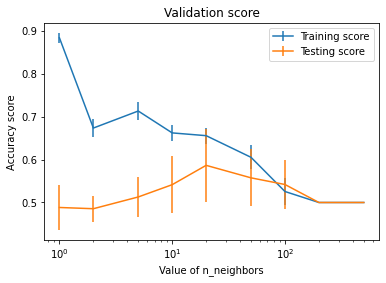

In [27]:
import matplotlib.pyplot as plt


plt.errorbar(param_range, train_scores.mean(axis=1),
             yerr=train_scores.std(axis=1), label='Training score')
plt.errorbar(param_range, test_scores.mean(axis=1),
             yerr=test_scores.std(axis=1), label='Testing score')
plt.legend()

plt.xscale("log")
plt.xlabel(r"Value of n_neighbors")
plt.ylabel("Accuracy score")
_ = plt.title("Validation score")

Text(0.5, 1.0, 'Validation curve of K-nearest neighbors')

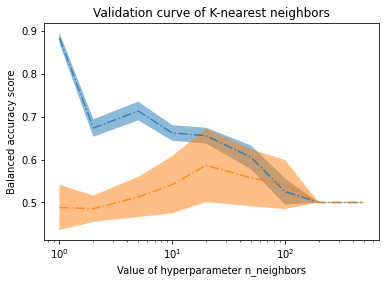

In [25]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
param_name = "kneighborsclassifier__n_neighbors"
train_scores, test_scores = validation_curve(
    model, data, target, param_name=param_name, param_range=param_range, cv=5,
    n_jobs=2, scoring="balanced_accuracy")

_, ax = plt.subplots()
for name, scores in zip(
    ["Training score", "Testing score"], [train_scores, test_scores]
):
    ax.plot(
        param_range, scores.mean(axis=1), linestyle="-.", label=name,
        alpha=0.8)
    ax.fill_between(
        param_range, scores.mean(axis=1) - scores.std(axis=1),
        scores.mean(axis=1) + scores.std(axis=1),
        alpha=0.5, label=f"std. dev. {name.lower()}")

ax.set_xticks(param_range)
ax.set_xscale("log")
ax.set_xlabel("Value of hyperparameter n_neighbors")
ax.set_ylabel("Balanced accuracy score")
ax.set_title("Validation curve of K-nearest neighbors")